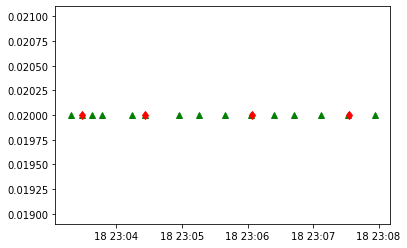

In [11]:
import sys
import numpy as np
from pandas import read_csv
import pandas as pd
from dateutil import parser
from datetime import datetime, timedelta, timezone
import pytz
import matplotlib.pyplot as plt
utc=pytz.UTC
#if1='l0recover_job_timestamps.csv' # Compaction for recovery writes. Happens before fio 
if2='flush_job_timestamps.csv'     # Compaction for L0
if3='compact_job_timestamps.csv'   # Compaction for other levels
id2=read_csv(if2, parse_dates=True, squeeze=True, sep=',', header=None)
id3=read_csv(if3, parse_dates=True, squeeze=True, sep=',', header=None)

id2len = len(id2.values)
id3len = len(id3.values)

x2_compact = [] # flush(L0) timestamps
x3_compact = [] # compact(>= L1) timestamps
y2_compact = [] # dummp y value
y3_compact = [] # dummp y value
w2_compact = [] # durations(width of compaction)
w3_compact = [] # durations(width of compaction)

for i in range(id2len):
    x2_compact.append((parser.parse(id2.values[i,1])-timedelta(hours=5)).replace(tzinfo=utc))
    w2_compact.append(id2.values[i,5]/1000000)
    y2_compact.append(0.02)
for i in range(id3len):
    x3_compact.append((parser.parse(id3.values[i,1])-timedelta(hours=5)).replace(tzinfo=utc))
    w3_compact.append(id3.values[i,5]/1000000)
    y3_compact.append(0.02)


plt.plot(x2_compact, y2_compact, label='4096 KiB',marker='^', c='g', linestyle='')
plt.plot(x3_compact, y3_compact, label='4096 KiB',marker='d', c='r', linestyle='')
#plt.set(xlabel='time stamps', ylabel='latency [secs]', title='Compaction Latency Time Series')
plt.show()
plt.close()

now = datetime.now(timezone.utc)